In [224]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

df = pd.read_csv('GEOSTAT 3.csv')
X = df['X']
Y = df['Y'] 

### Pearson Correlation Coefficient 

Covariance:  -27.877497246583353
rxy:  -0.11241702657716009
Intercept (a): -16.2619
Slope (b): -0.0337
SST (Total Sum of Squares): 14794.8931
SSR (Residual Sum of Squares): 14607.9213
R^2 (Coefficient of Determination): 0.0126


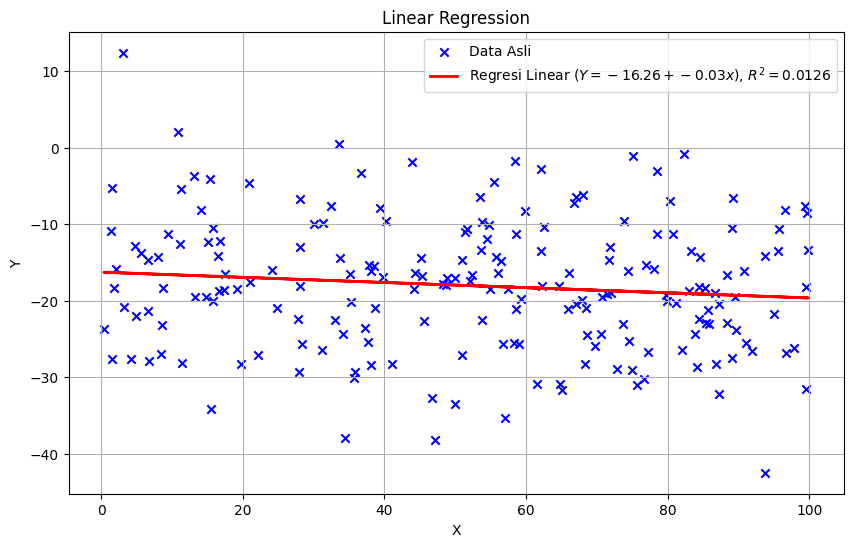

In [247]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

df = pd.read_csv('GEOSTAT 3.csv')
X = df['X']
Y = df['Y'] 

X_mean = np.mean(X)
Y_mean = np.mean(Y)

numerator = np.sum((X - X_mean) * (Y - Y_mean))
denominator = np.sqrt(np.sum((X - X_mean)**2)) * np.sqrt(np.sum((Y - Y_mean)**2))
r_xy = numerator / denominator
cov = np.sum((X - X_mean) * (Y - Y_mean)) / (len(X) - 1)

X_matrix = np.column_stack((np.ones(len(X)), X))  
# koefisien beta menggunakan least squares regression
beta = np.linalg.inv(X_matrix.T @ X_matrix) @ X_matrix.T @ Y

a, b = beta

Y_pred = a + b * X

SST = np.sum((Y - np.mean(Y)) ** 2)  # Total sum of squares
SSR = np.sum((Y - Y_pred) ** 2)  # Residual sum of squares
R_squared = 1 - (SSR / SST)

print("Covariance: ", cov)
print("rxy: ", r_xy)
print(f"Intercept (a): {a:.4f}")
print(f"Slope (b): {b:.4f}")
print(f"SST (Total Sum of Squares): {SST:.4f}")
print(f"SSR (Residual Sum of Squares): {SSR:.4f}")
print(f"R^2 (Coefficient of Determination): {R_squared:.4f}")

# Plot data asli sebagai scatter plot
fig, axes = plt.subplots(1, 1, figsize=(10, 6))
plt.scatter(X, Y, color='blue', label='Data Asli', marker='x')

# Plot garis regresi
plt.plot(X, Y_pred, color='red', label=fr"Regresi Linear ($Y = {a:.2f} + {b:.2f}x$), $R^2 = {R_squared:.4f}$", linewidth=2)

# Tambahkan label dan judul
plt.xlabel('X')
plt.ylabel('Y')
plt.title("Linear Regression")
plt.legend()
plt.grid()

# Tampilkan plot
plt.show()

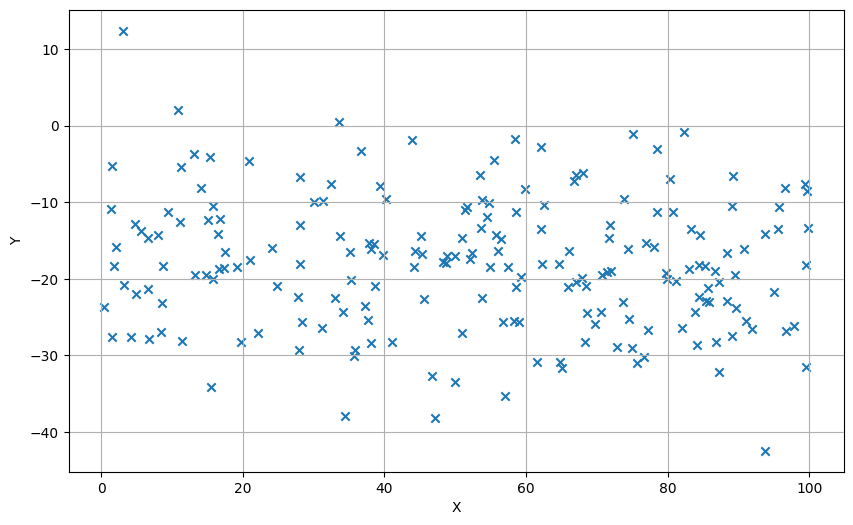

In [226]:
fig, axes = plt.subplots(1, 1, figsize=(10, 6))
plt.scatter(X, Y, marker='x')
plt.xlabel("X")
plt.ylabel("Y")
plt.grid()
plt.show()

## TASK 2

In [230]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

df = pd.read_csv('geostat3 2.csv')
x = df['X']
y = df['Y'] 

a:  0.6941281789759091
b:  -3.0772899650359307
c:  -76.19688654592038
d:  209.11903375098382
e:  21196.743776541716
SST (Total Sum of Squares):  281043027268391.94
SSR (Residual Sum of Squares):  23776901763968.953
RMSE (Root Mean Squared Error):  344796.3294755975
R^2 (Coefficient of Determination):  0.9153976457090239


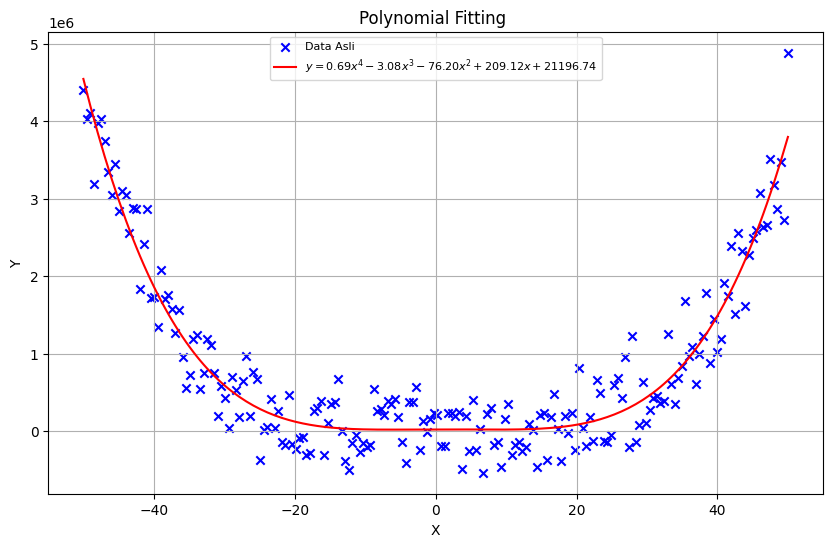

In [233]:

# Buat matriks Vandermonde untuk polinomial orde 4
X = np.vstack([x**4, x**3, x**2, x, np.ones_like(x)]).T

# Hitung koefisien polinomial dengan metode Least Squares
beta = np.linalg.inv(X.T @ X) @ X.T @ y
a, b, c, d, e = beta
print("a: ", a)
print("b: ", b)
print("c: ", c)
print("d: ", d)
print("e: ", e)

# Prediksi nilai Y menggunakan polinomial orde 4
y_pred = a * x**4 + b * x**3 + c * x**2 + d * x + e
# Hitung sum of squared values
SST = np.sum((y - np.mean(y)) ** 2)  # Total sum of squares
SSR = np.sum((y - y_pred) ** 2)  # Residual sum of squares
RMSE = np.sqrt(SSR / len(x))
R_squared = 1 - (SSR / SST)
print("SST (Total Sum of Squares): ", SST)
print("SSR (Residual Sum of Squares): ", SSR)
print("RMSE (Root Mean Squared Error): ", RMSE)
print("R^2 (Coefficient of Determination): ", R_squared)


label_str = rf"$y = {a:.2f}x^4 {b:+.2f}x^3 {c:+.2f}x^2 {d:+.2f}x {e:+.2f}$" 

# Visualisasi hasil fitting
fig, axes = plt.subplots(1, 1, figsize=(10, 6))
plt.scatter(x, y, label="Data Asli", color='blue', marker='x')
plt.plot(x, y_pred, label=label_str, color='red')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend(loc="best", fontsize=8)
plt.title("Polynomial Fitting ")
plt.grid()
plt.show()


a:  1426.0443593450855
b:  -4453.051804999832
c:  -358093.78266570135
SST (Total Sum of Squares):  281043027268391.94
SSR (Residual Sum of Squares):  47201672096499.805
RMSE (Root Mean Squared Error):  485806.9168738739
R^2 (Coefficient of Determination):  0.832048236331361


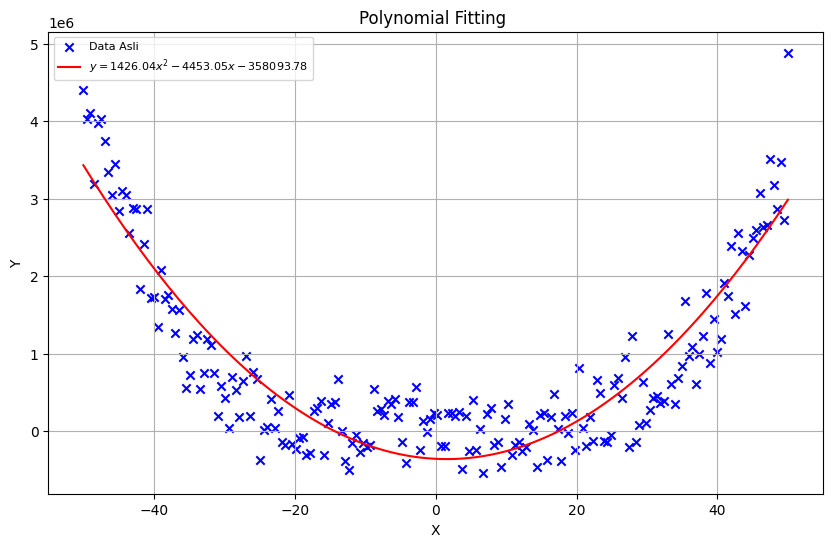

In [248]:

# Matriks Vandermonde untuk polinomial orde 2
X = np.vstack([x**2, x, np.ones_like(x)]).T

# Hitung koefisien polinomial dengan Least Squares
beta = np.linalg.inv(X.T @ X) @ X.T @ y
a, b, c = beta
print("a: ", a)
print("b: ", b)
print("c: ", c)

# Prediksi nilai Y dengan polinomial orde 2
y_pred = a * x**2 + b * x + c 

SST = np.sum((y - np.mean(y)) ** 2)  # Total sum of squares
SSR = np.sum((y - y_pred) ** 2)  # Residual sum of squares
R_squared = 1 - (SSR / SST)
RMSE = np.sqrt(SSR / len(x))

print("SST (Total Sum of Squares): ", SST)
print("SSR (Residual Sum of Squares): ", SSR)
print("RMSE (Root Mean Squared Error): ", RMSE)
print("R^2 (Coefficient of Determination): ", R_squared)

label_str = rf"$y = {a:.2f}x^2 {b:+.2f}x {c:+.2f}$" 

# Visualisasi hasil fitting
fig, axes = plt.subplots(1, 1, figsize=(10, 6))
plt.scatter(x, y, label="Data Asli", color='blue', marker='x')
plt.plot(x, y_pred, label=label_str, color='red')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend(fontsize=8)
plt.title("Polynomial Fitting ")
plt.grid()
plt.show()


a:  -3.0772899650359378
b:  1426.0443593450836
c:  209.11903375098518
d:  -358093.78266569995
SST (Total Sum of Squares):  281043027268391.94
SSR (Residual Sum of Squares):  46504855790860.66
RMSE (Root Mean Squared Error):  482207.71349523566
R^2 (Coefficient of Determination):  0.8345276300114388


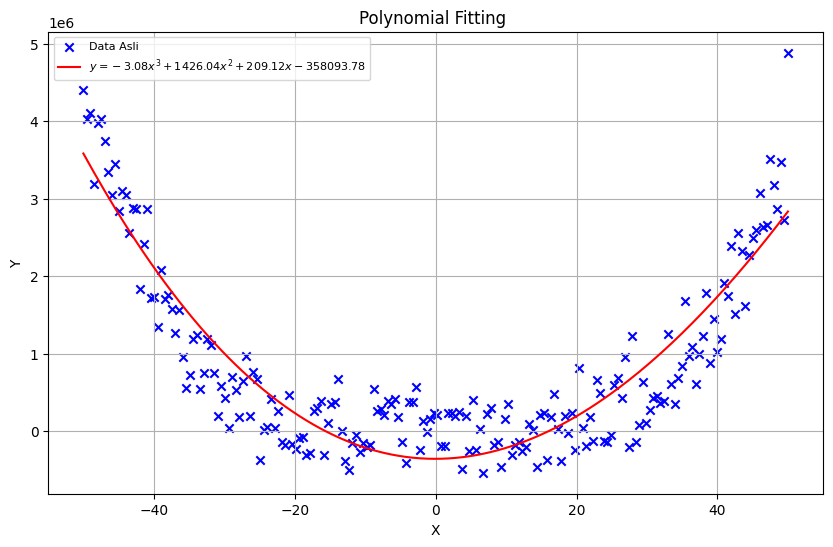

In [249]:

# Matriks Vandermonde untuk polinomial orde 3
X = np.vstack([x**3, x**2, x, np.ones_like(x)]).T

# Hitung koefisien polinomial dengan Least Squares
beta = np.linalg.inv(X.T @ X) @ X.T @ y
a, b, c, d= beta
print("a: ", a)
print("b: ", b)
print("c: ", c)
print("d: ", d)

# Prediksi nilai Y untuk polinomial orde 3
y_pred = a * x**3 + b * x**2 + c * x + d 

SST = np.sum((y - np.mean(y)) ** 2)  # Total sum of squares
SSR = np.sum((y - y_pred) ** 2)  # Residual sum of squares
RMSE = np.sqrt(SSR / len(x))
R_squared = 1 - (SSR / SST)
print("SST (Total Sum of Squares): ", SST)
print("SSR (Residual Sum of Squares): ", SSR)
print("RMSE (Root Mean Squared Error): ", RMSE)
print("R^2 (Coefficient of Determination): ", R_squared)


label_str = rf"$y = {a:.2f}x^3 {b:+.2f}x^2 {c:+.2f}x {d:+.2f}$" 

# Visualisasi hasil fitting
fig, axes = plt.subplots(1, 1, figsize=(10, 6))
plt.scatter(x, y, label="Data Asli", color='blue', marker='x')
plt.plot(x, y_pred, label=label_str, color='red')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend(loc="best", fontsize=8)
plt.grid()
plt.title("Polynomial Fitting ")
plt.show()

In [255]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

df = pd.read_csv('GEOSTAT3 3.csv')
x_data = df['X']
y_data = df['Y'] 

a: 1.71
b: 0.30
SSR: 3.6535
SST: 28.9631
R^2: 0.8739
RMSE: 0.1352


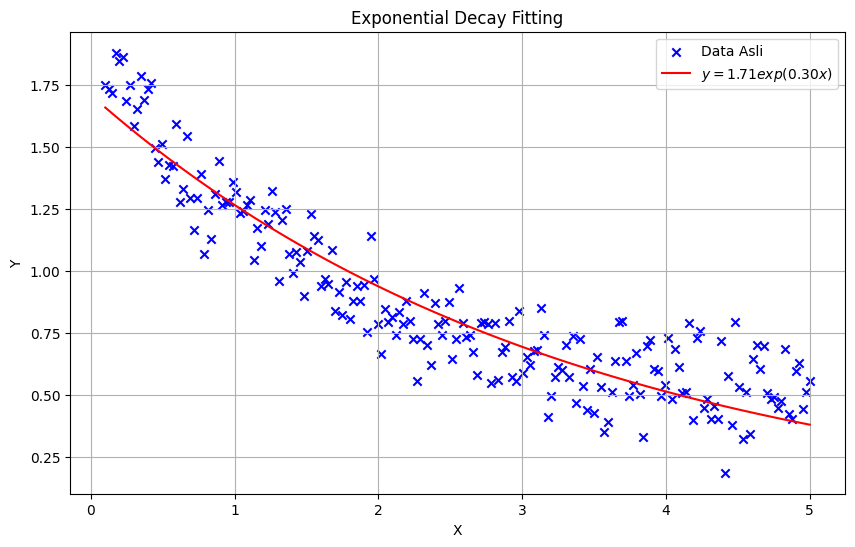

In [267]:
import numpy as np
import matplotlib.pyplot as plt

# Fungsi eksponensial decay: y = a * exp(-b * x)
def decay_func(x, a, b):
    return a * np.exp(-b * x)

# trial-error a dan b
a_trial = 1.71 
b_trial = 0.3 
print(f"a: {a_trial:.2f}")
print(f"b: {b_trial:.2f}")

# Buat prediksi 
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = decay_func(x_fit, a_trial, b_trial)

y_pred = decay_func(x_data, a_trial, b_trial)
SSR = np.sum((y_data - y_pred) ** 2)
SST = np.sum((y_data - np.mean(y_data)) ** 2)
RMSE = np.sqrt(SSR / len(x_data))
print(f"SSR: {SSR:.4f}")
print(f"SST: {SST:.4f}")
print(f"R^2: {1 - SSR / SST:.4f}")
print(f"RMSE: {RMSE:.4f}")

# Plot hasil fitting
fig, axes = plt.subplots(1, 1, figsize=(10, 6))
plt.scatter(x_data, y_data, label="Data Asli", color='blue', marker='x')
plt.plot(x_fit, y_fit, label=fr"$y = {a_trial:.2f} exp({b_trial:.2f}x)$", color='red')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid()
plt.title("Exponential Decay Fitting")
plt.show()


RMSE Logarithmic Fit: 0.13809078416229828


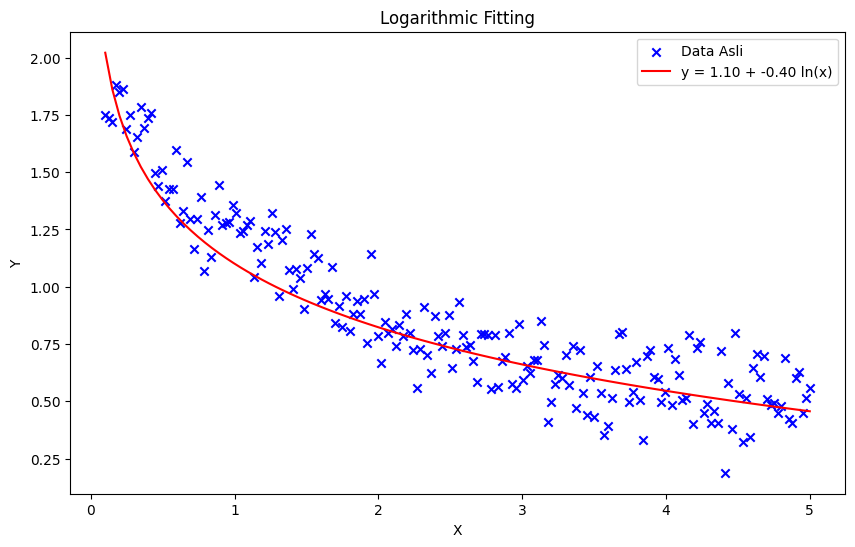

In [241]:


# Fungsi logaritmik
def logarithmic_func(x, a, b):
    return a + b * np.log(x)

# Trial error untuk a dan b
a_trial = 1.1  # Coba-coba nilai
b_trial = -0.4  # Coba-coba nilai

y_pred = logarithmic_func(x_data, a_trial, b_trial)
rmse = np.sqrt(np.mean((y_data - y_pred) ** 2))
print(f"RMSE Logarithmic Fit: {rmse}")

# Visualisasi
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = logarithmic_func(x_fit, a_trial, b_trial)

fit, axes = plt.subplots(1, 1, figsize=(10, 6))
plt.scatter(x_data, y_data, label="Data Asli", color='blue', marker='x')
plt.plot(x_fit, y_fit, label=f"y = {a_trial:.2f} + {b_trial:.2f} ln(x)", color='red')
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Logarithmic Fitting")
plt.show()


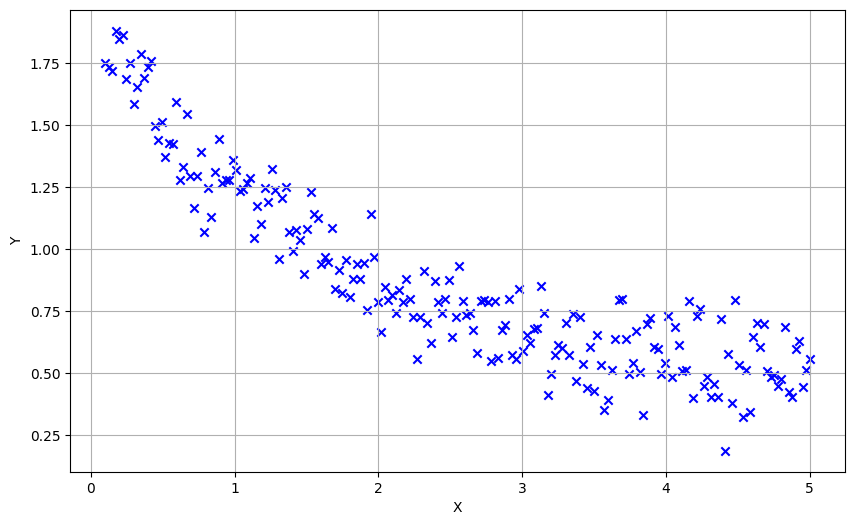

In [239]:
fig, axes = plt.subplots(1, 1, figsize=(10, 6))
plt.scatter(x_data, y_data, label="Data Asli", color='blue', marker='x')
plt.xlabel("X")
plt.ylabel("Y") 
plt.grid()
plt.show()